In [33]:
from Metaheuristicas.fitness_functions import *
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
X, y = load_and_preprocess_data(filename='Resources/SeisBenchV1_v1_1.json')


In [3]:
n = 500

In [4]:
from Metaheuristicas.Ant_Colony_Optimization import AdvancedBinaryAntColonyOptimization

aco = AdvancedBinaryAntColonyOptimization(n_ants=20, n_best=1, n_iterations=n, decay=0.8, alpha=1, beta=2,
                                          local_search_prob=0.15)

#### Models Naive Bayes and Decision Tree

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
DT = RandomForestClassifier()

#dataset split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# ABACO with Mutual Information


In [6]:
#TODO: checar parametros
aco = AdvancedBinaryAntColonyOptimization(n_ants=20, n_best=1, n_iterations=n, decay=0.6, alpha=1, beta=2,local_search_prob=0.15)
bestfeatures, best_fitness = aco.fit(X.values, y.values, fitness_function=mutual_information_eval)
ACMIFeatures = X.columns[bestfeatures.astype(bool)].tolist()


In [50]:
NB.fit(X_train[ACMIFeatures], y_train)

y_pred = NB.predict(X_test[ACMIFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))


Accuracy: 0.9563953488372093
Precision: 0.6428571428571429
Recall: 0.782608695652174
F1: 0.7058823529411765
AUC: 0.875728023838548


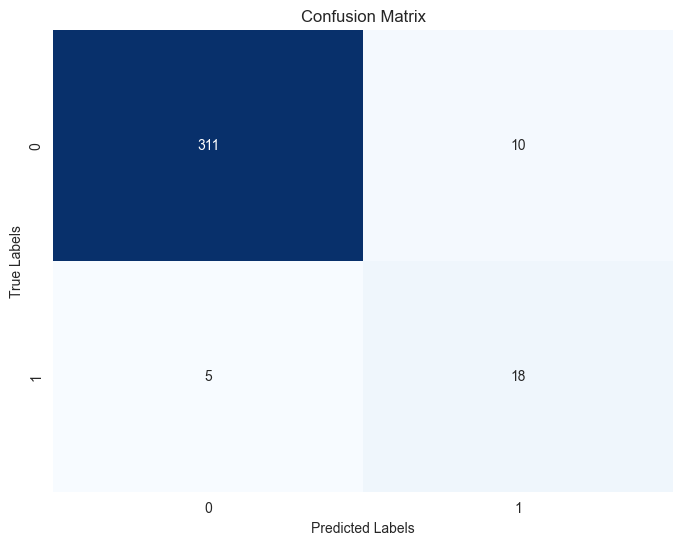

In [56]:
%matplotlib inline

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# auc plot
from sklearn.metrics import roc_curve


In [8]:
DT.fit(X_train[ACMIFeatures], y_train)

y_pred = DT.predict(X_test[ACMIFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.9651162790697675
Precision: 0.7894736842105263
Recall: 0.6521739130434783
F1: 0.7142857142857143
AUC: 0.8198564269267236


# ABACO with Chi2

In [9]:
aco = AdvancedBinaryAntColonyOptimization(n_ants=20, n_best=1, n_iterations=n, decay=0.6, alpha=1, beta=2,local_search_prob=0.15)

bestfeatures, best_fitness = aco.fit(X.values, y.values, fitness_function=chi2_eval)
ACX2Features = X.columns[bestfeatures.astype(bool)].tolist()

In [10]:
NB.fit(X_train[ACX2Features], y_train)
y_pred = NB.predict(X_test[ACX2Features])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.9534883720930233
Precision: 0.6296296296296297
Recall: 0.7391304347826086
F1: 0.68
AUC: 0.8539888934037654


In [11]:
DT.fit(X_train[ACX2Features], y_train)
y_pred = DT.predict(X_test[ACX2Features])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.9622093023255814
Precision: 0.75
Recall: 0.6521739130434783
F1: 0.6976744186046512
AUC: 0.8182987945279697


# ABACO with ReliefF

In [12]:
aco = AdvancedBinaryAntColonyOptimization(n_ants=20, n_best=1, n_iterations=n, decay=0.6, alpha=1, beta=2,local_search_prob=0.15)

bestfeatures, best_fitness = aco.fit(X.values, y.values, fitness_function=relieff_eval)
ACRFeatures = X.columns[bestfeatures.astype(bool)].tolist()

In [13]:
NB.fit(X_train[ACRFeatures], y_train)
y_pred = NB.predict(X_test[ACRFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.9447674418604651
Precision: 0.5714285714285714
Recall: 0.6956521739130435
F1: 0.6274509803921569
AUC: 0.829134498171475


In [14]:
DT.fit(X_train[ACRFeatures], y_train)
y_pred = DT.predict(X_test[ACRFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.9651162790697675
Precision: 0.7894736842105263
Recall: 0.6521739130434783
F1: 0.7142857142857143
AUC: 0.8198564269267236


## Red Neuronal


In [15]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

MUTUAL_INFORMATION 

In [16]:


# Crear y compilar el modelo
RN = Sequential()

# Definir la dimensión de entrada basada en las características seleccionadas
input_dim = X_train[ACMIFeatures].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
RN.compile(optimizer=Adam(learning_rate=0.001),
           loss=BinaryCrossentropy(),
           metrics=['accuracy'])

# Entrenar el modelo
history = RN.fit(X_train[ACMIFeatures], y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = RN.evaluate(X_test[ACMIFeatures], y_test)

print(f'Test Accuracy: {accuracy}')

# Realizar predicciones en el conjunto de prueba
y_pred_prob = RN.predict(X_test[ACMIFeatures])  # Predicciones como probabilidades
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir probabilidades a etiquetas (0 o 1)

# Calcular y mostrar las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))  # Usamos probabilidades para AUC


Epoch 1/100
20/20 [==============================] - 1s 8ms/step - loss: 0.6073 - accuracy: 0.7812 - val_loss: 0.4910 - val_accuracy: 0.9193
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8984 - val_loss: 0.3155 - val_accuracy: 0.9193
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.8984 - val_loss: 0.2662 - val_accuracy: 0.9193
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2719 - accuracy: 0.8984 - val_loss: 0.2324 - val_accuracy: 0.9193
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9000 - val_loss: 0.1945 - val_accuracy: 0.9255
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1718 - accuracy: 0.9266 - val_loss: 0.1600 - val_accuracy: 0.9317
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 0.9453 - val_loss: 0.1347 - val_accuracy: 0.9379
Epoch 8/100
2

CHI2

In [17]:

RN = Sequential()

input_dim = X_train[ACX2Features].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001),
           loss=BinaryCrossentropy(),
           metrics=['accuracy'])

history = RN.fit(X_train[ACX2Features], y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = RN.evaluate(X_test[ACX2Features], y_test)

print(f'Test Accuracy: {accuracy}')
y_pred_prob = RN.predict(X_test[ACX2Features])
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5261 - accuracy: 0.8734 - val_loss: 0.3720 - val_accuracy: 0.9193
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8984 - val_loss: 0.2754 - val_accuracy: 0.9193
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2779 - accuracy: 0.8984 - val_loss: 0.2309 - val_accuracy: 0.9193
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2201 - accuracy: 0.9031 - val_loss: 0.1862 - val_accuracy: 0.9193
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1706 - accuracy: 0.9328 - val_loss: 0.1575 - val_accuracy: 0.9317
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1352 - accuracy: 0.9453 - val_loss: 0.1261 - val_accuracy: 0.9379
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9563 - val_loss: 0.1135 - val_accuracy: 0.9441
Epoch 8/100
2

RELIEFF

In [18]:
RN = Sequential()

input_dim = X_train[ACRFeatures].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001),
           loss=BinaryCrossentropy(),
           metrics=['accuracy'])

history = RN.fit(X_train[ACRFeatures], y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = RN.evaluate(X_test[ACRFeatures], y_test)

print(f'Test Accuracy: {accuracy}')
y_pred_prob = RN.predict(X_test[ACRFeatures])
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4064 - accuracy: 0.8984 - val_loss: 0.3003 - val_accuracy: 0.9193
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2958 - accuracy: 0.8984 - val_loss: 0.2641 - val_accuracy: 0.9193
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.8984 - val_loss: 0.2449 - val_accuracy: 0.9193
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.8984 - val_loss: 0.2228 - val_accuracy: 0.9193
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1984 - accuracy: 0.9203 - val_loss: 0.1984 - val_accuracy: 0.9255
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1697 - accuracy: 0.9328 - val_loss: 0.1827 - val_accuracy: 0.9255
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1463 - accuracy: 0.9438 - val_loss: 0.1600 - val_accuracy: 0.9317
Epoch 8/100
2

In [19]:
# import pickle
# 
# with open('ACMIFeatures.pkl', 'wb') as f:
#     pickle.dump(ACMIFeatures, f)
# with open('ACX2Features.pkl', 'wb') as f:
#     pickle.dump(ACX2Features, f)
# with open('ACRFeatures.pkl', 'wb') as f:
#     pickle.dump(ACRFeatures, f)

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
#NB confusion matrix
y_pred = NB.predict(X_test[ACMIFeatures])


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- f14_f_peaks_pos_1
- f15_f_90_percent_energy
- f23_f_peak_1020_value
- f26_f_peak_2030_pos
- f30_f_PeaksAboveRMSDensity_fun
- ...
Feature names seen at fit time, yet now missing:
- f11_t_energy
- f18_f_std
- f1_t_mean
- f20_f_energy
- f2_t_std
- ...
